#Problem 1: A simple ODE (chaos in the atmosphere)

Author: Zuria Bauer [CAChemE.org](http://cacheme.org) 

In 1963 the meteorologist and mathematician from MIT called Edward Lorenz 
derived the first chaotic dynamic system governing the atmosphere. 
The most drastically simplified version 
of the full fluid‐dynamical equations led 
to a system of nonlinear ordinary differential 
of the model climate with just three state variables 
$y_1$, $y_2$ y and $y_3$:


$$\frac{dy_1}{dt} = -\beta y_1 + y_2 y_3$$

$$\frac{dy_2}{dt} = -\sigma (y_3 - y_2) $$

$$\frac{dy_3}{dt} = (\rho - y_1) y_2 - y_3$$

where $\sigma$ is the Prandtl number and $\rho$ is the Rayleig number 
and $\beta$ is a geometric factor. Usually $\beta = 8/3$ and 
$\rho$ is varied. 
The system exhibits chaotic behaviour for $\rho = 28 $.
The steady state solution of the abovementioned Lorenz equations 
($\frac{dy}{dt} = 0 \rightarrow f(y) = 0 $) gives the
following equilibrium point:

$$y^{oo} = (\rho - 1, \eta, \eta)$$

$$\eta = \sqrt{\beta (\rho -1)}$$

This is an unstable equilibrium point of a chaotic system (if $\rho = 28$ ). Therefore any small perturbation in the
initial conditions will lead to a dramatically different time evolution of the dependent variables. Verify this fact
by solving the simplified Lorenz ODE system for the independent variable ( t ) ranging between 0 and 100 units
of time with the following initial conditions:

$$y_{t_0} = (\rho - 1, \eta, \eta + 0.01) $$

##Code

In [1]:
#let's import the Python libraries we need:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from __future__ import division

%matplotlib inline

plt.style.use('bmh')

In [2]:
#Importamos la librería para los widgets
from IPython.html.widgets import interact
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Ok we are ready to go!

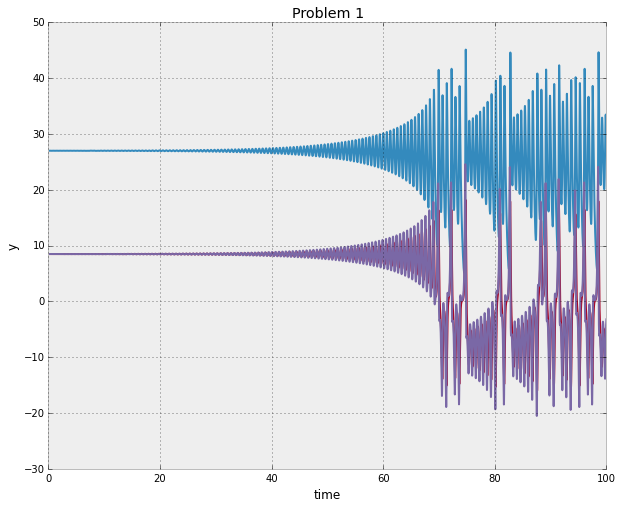

In [3]:
#Datos

sigma = 10
beta = 8/3
rho = 28
t0 = 100

#Initializing components

nu = np.sqrt(beta * (rho - 1))


def diff_eqs(y,t):
    
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    
    dydt0 = np.ones(3)
    dydt1 = - beta * y1 + y2 * y3
    dydt2 = sigma * (y3 - y2)
    dydt3 = (rho - y1) * y2 - y3
    
    dydt = np.array([dydt1, dydt2, dydt3])
    return (dydt)

#Initial conditions given for the reactor

y0 = np.array([rho - 1, nu, nu + 0.01])
t = np.linspace(0, t0, 100000)

# solving the ODEs

soln = odeint(diff_eqs, y0, t)

y1  = soln[:, 0] # mol*L-1
y2  = soln[:, 1] # mol*L-1
y3  = soln[:, 2] # mol*L-1

# Plotting the results

fig = plt.figure(figsize=(10, 8))
plt.plot(t, y1,
         t, y2,
         t, y3) 

plt.ylabel('y')
plt.xlabel(u'time')
plt.title(u'Problem 1')

Ok, that's nice. What if we introduce the Widgets?

####Widgets

In [4]:
def Ejercicio1(sigma, beta, rho):
    #Datos

#    sigma = 10
#    beta = 8/3
#    rho = 28
    t0 = 100

    #Initializing components

    nu = np.sqrt(beta * (rho - 1))


    def diff_eqs(y,t):

        y1 = y[0]
        y2 = y[1]
        y3 = y[2]

        dydt0 = np.ones(3)
        dydt1 = - beta * y1 + y2 * y3
        dydt2 = sigma * (y3 - y2)
        dydt3 = (rho - y1) * y2 - y3

        dydt = np.array([dydt1, dydt2, dydt3])
        return (dydt)

    #Initial conditions given for the reactor

    y0 = np.array([rho - 1, nu, nu + 0.01])
    t = np.linspace(0, t0, 100000)
    
    # solving the ODEs

    soln = odeint(diff_eqs, y0, t)

    y1  = soln[:, 0] # mol*L-1
    y2  = soln[:, 1] # mol*L-1
    y3  = soln[:, 2] # mol*L-1
    
    # Plotting the results

    fig = plt.figure(figsize=(10, 8))
    plt.plot(t, y1,
             t, y2,
             t, y3) 

    plt.ylabel('y')
    plt.xlabel(u'time')
    plt.title(u'Problem 1')

<function __main__.Ejercicio1>

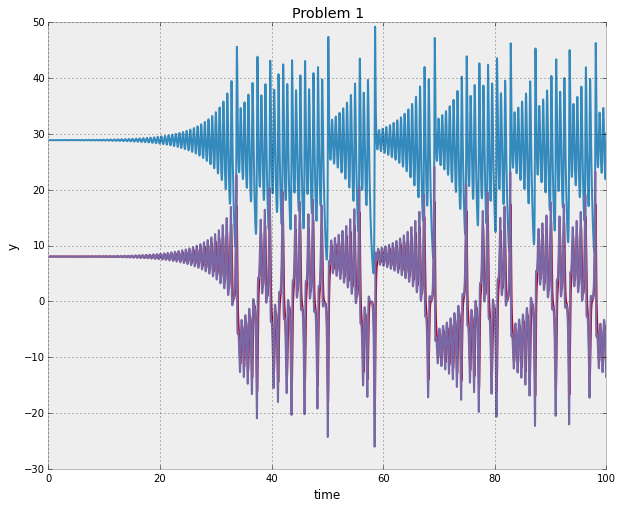

In [5]:
interact(Ejercicio1,
         sigma = (5, 15, 0.1), beta = (4/3, 10/3, 0.1), rho = (20, 40, 0.1))